In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2SM

In [84]:
def plot_acc(path, title):
    df = pd.read_csv(path)
    _train = df['train_acc'].values
    _test = df['test_acc'].values

    num = 50
    train = np.convolve(_train, np.ones(num)/num)[:len(_train)]
    train[:num] = [np.mean(_train[:n+1]) for n in range(num)]
    test = np.convolve(_test, np.ones(num)/num)[:len(_test)]
    test[:num] = [np.mean(_test[:n+1]) for n in range(num)]
    
    plt.plot(_train, 'lightblue')
    plt.plot(_test, 'pink')
    plt.plot(train, 'blue', label='train')
    plt.plot(test, 'red', label='test')
    plt.legend(loc='lower right')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy [%]')
    plt.title(title)
    plt.ylim([-5, 105])
    plt.grid()
    plt.show()

In [98]:
def plot_loss(path, title):
    df = pd.read_csv(path)
    _train = df['train_loss'].values
    _test = df['test_loss'].values

    num = 50
    train = np.convolve(_train, np.ones(num)/num)[:len(_train)]
    train[:num] = [np.mean(_train[:n+1]) for n in range(num)]
    test = np.convolve(_test, np.ones(num)/num)[:len(_test)]
    test[:num] = [np.mean(_test[:n+1]) for n in range(num)]
    
    plt.plot(_train, 'lightblue')
    plt.plot(_test, 'pink')
    plt.plot(train, 'blue', label='train')
    plt.plot(test, 'red', label='test')
    plt.legend(loc='upper right')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.ylim([-0.125, 2.625])
    plt.grid()
    plt.show()

In [69]:
pd.read_csv('data/gdb06_bert_train.csv')['tanimoto'].mean()

0.427841762605043

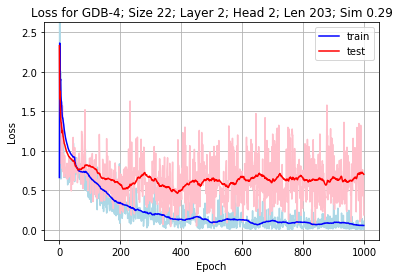

In [99]:
plot_loss('../result/log/GDB04.csv', 'Loss for GDB-4; Size 22; Layer 2; Head 2; Len 203; Sim 0.29')

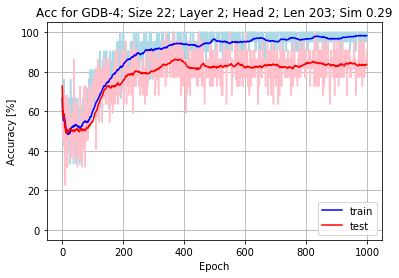

In [92]:
plot_acc('../result/log/GDB04.csv', 'Acc for GDB-4; Size 22; Layer 2; Head 2; Len 203; Sim 0.29')

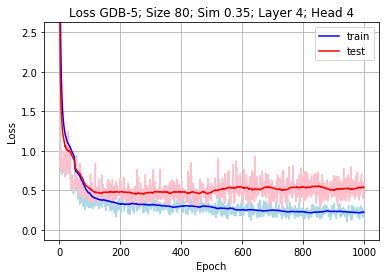

In [212]:
plot_loss('../result/log/GDB05.csv', 'Loss GDB-5; Size 80; Sim 0.35; Layer 4; Head 4')

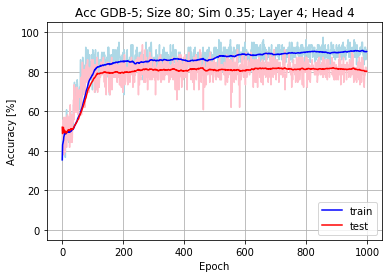

In [213]:
plot_acc('../result/log/GDB05.csv', 'Acc GDB-5; Size 80; Sim 0.35; Layer 4; Head 4')

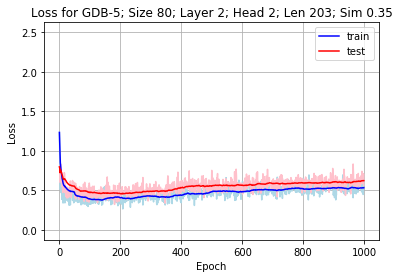

In [128]:
plot_loss('../result/log/GDB05_trans.csv', 'Loss for GDB-5; Size 80; Layer 2; Head 2; Len 203; Sim 0.35')

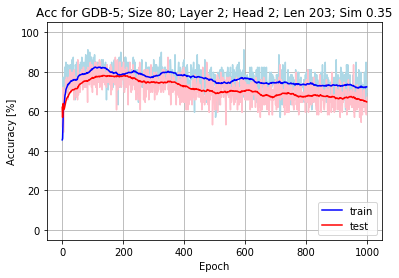

In [129]:
plot_acc('../result/log/GDB05_trans.csv', 'Acc for GDB-5; Size 80; Layer 2; Head 2; Len 203; Sim 0.35')

# MSM

In [186]:
def plot(path, title):
    df = pd.read_csv(path)
    _train = df['train_loss'].values
    _test = df['test_loss'].values

    num = 50
    train = np.convolve(_train, np.ones(num)/num)[:len(_train)]
    train[:num] = [np.mean(_train[:n+1]) for n in range(num)]
    test = np.convolve(_test, np.ones(num)/num)[:len(_test)]
    test[:num] = [np.mean(_test[:n+1]) for n in range(num)]
    
    plt.plot(_train, 'lightblue')
    plt.plot(_test, 'pink')
    plt.plot(train, 'blue', label='train')
    plt.plot(test, 'red', label='test')
    plt.legend(loc='upper right')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.ylim([0, 130])
    #plt.ylim([0, 0.1])
    plt.grid()
    plt.show()

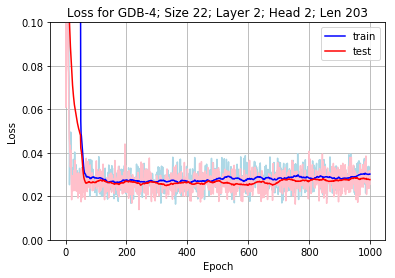

In [176]:
plot('../result/log/GDB04.csv', 'Loss for GDB-4; Size 22; Layer 2; Head 2; Len 203')

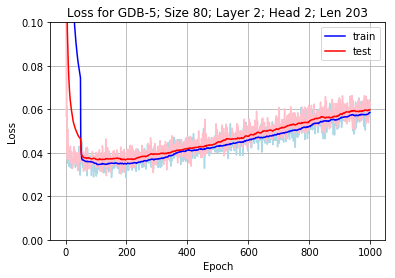

In [181]:
plot('../result/log/GDB05.csv', 'Loss for GDB-5; Size 80; Layer 2; Head 2; Len 203')

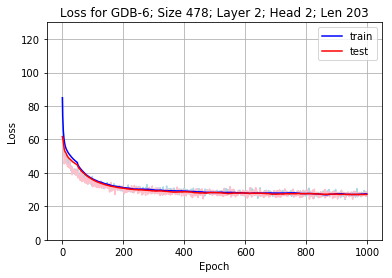

In [163]:
plot('../result/log/GDB06.csv', 'Loss for GDB-6; Size 478; Layer 2; Head 2; Len 203')

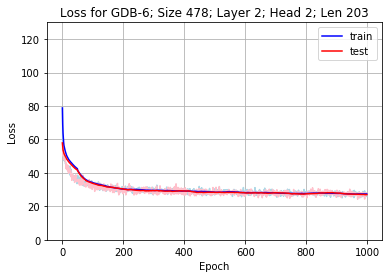

In [190]:
plot('../result/log/GDB06_trans.csv', 'Loss for GDB-6; Size 478; Layer 2; Head 2; Len 203')